In [5]:
import requests
import csv
import os
import datetime
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [39]:
import requests

url = "https://api.patentsview.org/patents/query"

query_payload = {
    "q": {
        "_and": [
            {
                "_gte": {"patent_date": "2018-01-01"}
            },
            {
                "_lte": {"patent_date": "2024-12-31"}
            },
            {
            "_or": [
                {"_text_phrase": {"patent_title": "machine learning"}},
                {"_text_phrase": {"patent_title": "ML"}},
                {"_text_phrase": {"patent_title": "Natural Language Processing"}},
                {"_text_phrase": {"patent_title": "NLP"}}
                ]
            }
        ]
    },
    "f": [
        "appcit_app_number",
        "appcit_category",
        "appcit_date",
        "appcit_kind",
        "appcit_sequence",
        "app_country",
        "app_date",
        "app_number",
        "app_type",
        "assignee_city",
        "assignee_country",
        "assignee_county",
        "assignee_county_fips",
        "assignee_first_name",
        "assignee_first_seen_date",
        "assignee_id",
        "assignee_last_name",
        "assignee_last_seen_date",
        "assignee_lastknown_city",
        "assignee_lastknown_country",
        "assignee_lastknown_latitude",
        "assignee_lastknown_location_id",
        "assignee_lastknown_longitude",
        "assignee_lastknown_state",
        "assignee_latitude",
        "assignee_location_id",
        "assignee_longitude",
        "assignee_organization",
        "assignee_sequence",
        "assignee_state",
        "assignee_state_fips",
        "assignee_total_num_inventors",
        "assignee_total_num_patents",
        "assignee_type",
        "cited_patent_category",
        "cited_patent_date",
        "cited_patent_kind",
        "cited_patent_number",
        "cited_patent_sequence",
        "cited_patent_title",   
        "citedby_patent_category",
        "citedby_patent_date",
        "citedby_patent_kind",
        "citedby_patent_number",
        "citedby_patent_title",
        "cpc_category",
        "cpc_first_seen_date",
        "cpc_group_id",
        "cpc_group_title",
        "cpc_last_seen_date",
        "cpc_section_id",
        "cpc_sequence",
        "cpc_subgroup_id",
        "cpc_subgroup_title",
        "cpc_subsection_id",
        "cpc_subsection_title",
        "cpc_total_num_assignees",
        "cpc_total_num_inventors",
        "cpc_total_num_patents",
        "detail_desc_length",
        "examiner_first_name",
        "examiner_id",
        "examiner_last_name",
        "examiner_role",
        "examiner_group",
        "forprior_country",
        "forprior_date",
        "forprior_docnumber",
        "forprior_kind",
        "forprior_sequence",
        "govint_contract_award_number",
        "govint_org_id",
        "govint_org_level_one",
        "govint_org_level_two",
        "govint_org_level_three",
        "govint_org_name",
        "govint_raw_statement",
        "inventor_city",
        "inventor_country",
        "inventor_county",
        "inventor_county_fips",
        "inventor_first_name",
        "inventor_first_seen_date",
        "inventor_id",
        "inventor_last_name",
        "inventor_last_seen_date",
        "inventor_lastknown_city",
        "inventor_lastknown_country",
        "inventor_lastknown_latitude",
        "inventor_lastknown_location_id",
        "inventor_lastknown_longitude",
        "inventor_lastknown_state",
        "inventor_latitude",
        "inventor_location_id",
        "inventor_longitude",
        "inventor_sequence",
        "inventor_state",
        "inventor_state_fips",
        "inventor_total_num_patents",
        "ipc_action_date",
        "ipc_class",
        "ipc_classification_data_source",
        "ipc_classification_value",
        "ipc_first_seen_date",
        "ipc_last_seen_date",
        "ipc_main_group",
        "ipc_section",
        "ipc_sequence",
        "ipc_subclass",
        "ipc_subgroup",
        "ipc_symbol_position",
        "ipc_total_num_assignees",
        "ipc_total_num_inventors",
        "ipc_version_indicator",
        "lawyer_first_name",
        "lawyer_first_seen_date",
        "lawyer_id",
        "lawyer_last_name",
        "lawyer_last_seen_date",
        "lawyer_organization",
        "lawyer_sequence",
        "lawyer_total_num_assignees",
        "lawyer_total_num_inventors",
        "lawyer_total_num_patents",
        "nber_category_id",
        "nber_category_title",
        "nber_first_seen_date",
        "nber_last_seen_date",
        "nber_subcategory_id",
        "nber_subcategory_title",
        "nber_total_num_assignees",
        "nber_total_num_inventors",
        "nber_total_num_patents",
        "patent_abstract",
        "patent_average_processing_time",
        "patent_date",
        "patent_firstnamed_assignee_city",
        "patent_firstnamed_assignee_country",
        "patent_firstnamed_assignee_id",
        "patent_firstnamed_assignee_latitude",
        "patent_firstnamed_assignee_location_id",
        "patent_firstnamed_assignee_longitude",
        "patent_firstnamed_assignee_state",
        "patent_firstnamed_inventor_city",
        "patent_firstnamed_inventor_country",
        "patent_firstnamed_inventor_id",
        "patent_firstnamed_inventor_latitude",
        "patent_firstnamed_inventor_location_id",
        "patent_firstnamed_inventor_longitude",
        "patent_firstnamed_inventor_state",
        "patent_kind",
        "patent_num_cited_by_us_patents",
        "patent_num_claims",
        "patent_num_combined_citations",
        "patent_num_foreign_citations",
        "patent_num_us_application_citations",
        "patent_num_us_patent_citations",
        "patent_number",
        "patent_processing_time",
        "patent_title",
        "patent_type",
        "patent_year",
        "pct_102_date",
        "pct_371_date",
        "pct_date",
        "pct_docnumber",
        "pct_doctype",
        "pct_kind",
        "rawinventor_first_name",
        "rawinventor_last_name",
        "uspc_first_seen_date",
        "uspc_last_seen_date",
        "uspc_mainclass_id",
        "uspc_mainclass_title",
        "uspc_sequence",
        "uspc_subclass_id",
        "uspc_subclass_title",
        "uspc_total_num_assignees",
        "uspc_total_num_inventors",
        "uspc_total_num_patents",
        "wipo_field_id",
        "wipo_field_title",
        "wipo_sector_title",
        "wipo_sequence"

    ],
    "o": {
        "per_page": 1000,  
        "page": 1          
    }
}

response = requests.post(url, json=query_payload)
data = response.json()
total_patent_count = data['total_patent_count']
per_page = query_payload['o']['per_page']
total_pages = (total_patent_count + per_page - 1) // per_page

In [40]:
all_patents = []

for page in range(1, total_pages + 1):
    query_payload['o']['page'] = page
    response = requests.post(url, json=query_payload)
    data = response.json()
    patents = data.get('patents', [])
    all_patents.extend(patents)
    print(f"Retrieved page {page}/{total_pages}")

print(f"Total patents retrieved: {len(all_patents)}\n")


Retrieved page 1/8
Retrieved page 2/8
Retrieved page 3/8
Retrieved page 4/8
Retrieved page 5/8
Retrieved page 6/8
Retrieved page 7/8
Retrieved page 8/8
Total patents retrieved: 7092



In [41]:
with open('patents.csv', 'w', newline='') as csvfile:
    fieldnames = [
"appcit_app_number",
"appcit_category",
"appcit_date",
"appcit_kind",
"appcit_sequence",
"app_country",
"app_date",
"app_number",
"app_type",
"assignee_city",
"assignee_country",
"assignee_county",
"assignee_county_fips",
"assignee_first_name",
"assignee_first_seen_date",
"assignee_id",
"assignee_last_name",
"assignee_last_seen_date",
"assignee_lastknown_city",
"assignee_lastknown_country",
"assignee_lastknown_latitude",
"assignee_lastknown_location_id",
"assignee_lastknown_longitude",
"assignee_lastknown_state",
"assignee_latitude",
"assignee_location_id",
"assignee_longitude",
"assignee_organization",
"assignee_sequence",
"assignee_state",
"assignee_state_fips",
"assignee_total_num_inventors",
"assignee_total_num_patents",
"assignee_type",
"cited_patent_category",
"cited_patent_date",
"cited_patent_kind",
"cited_patent_number",
"cited_patent_sequence",
"cited_patent_title",
"citedby_patent_category",
"citedby_patent_date",
"citedby_patent_kind",
"citedby_patent_number",
"citedby_patent_title",
"cpc_category",
"cpc_first_seen_date",
"cpc_group_id",
"cpc_group_title",
"cpc_last_seen_date",
"cpc_section_id",
"cpc_sequence",
"cpc_subgroup_id",
"cpc_subgroup_title",
"cpc_subsection_id",
"cpc_subsection_title",
"cpc_total_num_assignees",
"cpc_total_num_inventors",
"cpc_total_num_patents",
"detail_desc_length",
"examiner_first_name",
"examiner_id",
"examiner_last_name",
"examiner_role",
"examiner_group",
"forprior_country",
"forprior_date",
"forprior_docnumber",
"forprior_kind",
"forprior_sequence",
"govint_contract_award_number",
"govint_org_id",
"govint_org_level_one",
"govint_org_level_two",
"govint_org_level_three",
"govint_org_name",
"govint_raw_statement",
"inventor_city",
"inventor_country",
"inventor_county",
"inventor_county_fips",
"inventor_first_name",
"inventor_first_seen_date",
"inventor_id",
"inventor_last_name",
"inventor_last_seen_date",
"inventor_lastknown_city",
"inventor_lastknown_country",
"inventor_lastknown_latitude",
"inventor_lastknown_location_id",
"inventor_lastknown_longitude",
"inventor_lastknown_state",
"inventor_latitude",
"inventor_location_id",
"inventor_longitude",
"inventor_sequence",
"inventor_state",
"inventor_state_fips",
"inventor_total_num_patents",
"ipc_action_date",
"ipc_class",
"ipc_classification_data_source",
"ipc_classification_value",
"ipc_first_seen_date",
"ipc_last_seen_date",
"ipc_main_group",
"ipc_section",
"ipc_sequence",
"ipc_subclass",
"ipc_subgroup",
"ipc_symbol_position",
"ipc_total_num_assignees",
"ipc_total_num_inventors",
"ipc_version_indicator",
"lawyer_first_name",
"lawyer_first_seen_date",
"lawyer_id",
"lawyer_last_name",
"lawyer_last_seen_date",
"lawyer_organization",
"lawyer_sequence",
"lawyer_total_num_assignees",
"lawyer_total_num_inventors",
"lawyer_total_num_patents",
"nber_category_id",
"nber_category_title",
"nber_first_seen_date",
"nber_last_seen_date",
"nber_subcategory_id",
"nber_subcategory_title",
"nber_total_num_assignees",
"nber_total_num_inventors",
"nber_total_num_patents",
"patent_abstract",
"patent_average_processing_time",
"patent_date",
"patent_firstnamed_assignee_city",
"patent_firstnamed_assignee_country",
"patent_firstnamed_assignee_id",
"patent_firstnamed_assignee_latitude",
"patent_firstnamed_assignee_location_id",
"patent_firstnamed_assignee_longitude",
"patent_firstnamed_assignee_state",
"patent_firstnamed_inventor_city",
"patent_firstnamed_inventor_country",
"patent_firstnamed_inventor_id",
"patent_firstnamed_inventor_latitude",
"patent_firstnamed_inventor_location_id",
"patent_firstnamed_inventor_longitude",
"patent_firstnamed_inventor_state",
"patent_kind",
"patent_num_cited_by_us_patents",
"patent_num_claims",
"patent_num_combined_citations",
"patent_num_foreign_citations",
"patent_num_us_application_citations",
"patent_num_us_patent_citations",
"patent_number",
"patent_processing_time",
"patent_title",
"patent_type",
"patent_year",
"pct_102_date",
"pct_371_date",
"pct_date",
"pct_docnumber",
"pct_doctype",
"pct_kind",
"rawinventor_first_name",
"rawinventor_last_name",
"uspc_first_seen_date",
"uspc_last_seen_date",
"uspc_mainclass_id",
"uspc_mainclass_title",
"uspc_sequence",
"uspc_subclass_id",
"uspc_subclass_title",
"uspc_total_num_assignees",
"uspc_total_num_inventors",
"uspc_total_num_patents",
"wipo_field_id",
"wipo_field_title",
"wipo_sector_title",
"wipo_sequence"
]
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()
    items = all_patents
    
    for item in items:
        writer.writerow({"appcit_app_number" : item.get("appcit_app_number", ""),
"appcit_category" : item.get("appcit_category", ""),
"appcit_date" : item.get("appcit_date", ""),
"appcit_kind" : item.get("appcit_kind", ""),
"appcit_sequence" : item.get("appcit_sequence", ""),
"app_country" : item.get("app_country", ""),
"app_date" : item.get("app_date", ""),
"app_number" : item.get("app_number", ""),
"app_type" : item.get("app_type", ""),
"assignee_city" : item.get("assignee_city", ""),
"assignee_country" : item.get("assignee_country", ""),
"assignee_county" : item.get("assignee_county", ""),
"assignee_county_fips" : item.get("assignee_county_fips", ""),
"assignee_first_name" : item.get("assignee_first_name", ""),
"assignee_first_seen_date" : item.get("assignee_first_seen_date", ""),
"assignee_id" : item.get("assignee_id", ""),
"assignee_last_name" : item.get("assignee_last_name", ""),
"assignee_last_seen_date" : item.get("assignee_last_seen_date", ""),
"assignee_lastknown_city" : item.get("assignee_lastknown_city", ""),
"assignee_lastknown_country" : item.get("assignee_lastknown_country", ""),
"assignee_lastknown_latitude" : item.get("assignee_lastknown_latitude", ""),
"assignee_lastknown_location_id" : item.get("assignee_lastknown_location_id", ""),
"assignee_lastknown_longitude" : item.get("assignee_lastknown_longitude", ""),
"assignee_lastknown_state" : item.get("assignee_lastknown_state", ""),
"assignee_latitude" : item.get("assignee_latitude", ""),
"assignee_location_id" : item.get("assignee_location_id", ""),
"assignee_longitude" : item.get("assignee_longitude", ""),
"assignee_organization" : item.get("assignee_organization", ""),
"assignee_sequence" : item.get("assignee_sequence", ""),
"assignee_state" : item.get("assignee_state", ""),
"assignee_state_fips" : item.get("assignee_state_fips", ""),
"assignee_total_num_inventors" : item.get("assignee_total_num_inventors", ""),
"assignee_total_num_patents" : item.get("assignee_total_num_patents", ""),
"assignee_type" : item.get("assignee_type", ""),
"cited_patent_category" : item.get("cited_patent_category", ""),
"cited_patent_date" : item.get("cited_patent_date", ""),
"cited_patent_kind" : item.get("cited_patent_kind", ""),
"cited_patent_number" : item.get("cited_patent_number", ""),
"cited_patent_sequence" : item.get("cited_patent_sequence", ""),
"cited_patent_title" : item.get("cited_patent_title", ""),
"citedby_patent_category" : item.get("citedby_patent_category", ""),
"citedby_patent_date" : item.get("citedby_patent_date", ""),
"citedby_patent_kind" : item.get("citedby_patent_kind", ""),
"citedby_patent_number" : item.get("citedby_patent_number", ""),
"citedby_patent_title" : item.get("citedby_patent_title", ""),
"cpc_category" : item.get("cpc_category", ""),
"cpc_first_seen_date" : item.get("cpc_first_seen_date", ""),
"cpc_group_id" : item.get("cpc_group_id", ""),
"cpc_group_title" : item.get("cpc_group_title", ""),
"cpc_last_seen_date" : item.get("cpc_last_seen_date", ""),
"cpc_section_id" : item.get("cpc_section_id", ""),
"cpc_sequence" : item.get("cpc_sequence", ""),
"cpc_subgroup_id" : item.get("cpc_subgroup_id", ""),
"cpc_subgroup_title" : item.get("cpc_subgroup_title", ""),
"cpc_subsection_id" : item.get("cpc_subsection_id", ""),
"cpc_subsection_title" : item.get("cpc_subsection_title", ""),
"cpc_total_num_assignees" : item.get("cpc_total_num_assignees", ""),
"cpc_total_num_inventors" : item.get("cpc_total_num_inventors", ""),
"cpc_total_num_patents" : item.get("cpc_total_num_patents", ""),
"detail_desc_length" : item.get("detail_desc_length", ""),
"examiner_first_name" : item.get("examiner_first_name", ""),
"examiner_id" : item.get("examiner_id", ""),
"examiner_last_name" : item.get("examiner_last_name", ""),
"examiner_role" : item.get("examiner_role", ""),
"examiner_group" : item.get("examiner_group", ""),
"forprior_country" : item.get("forprior_country", ""),
"forprior_date" : item.get("forprior_date", ""),
"forprior_docnumber" : item.get("forprior_docnumber", ""),
"forprior_kind" : item.get("forprior_kind", ""),
"forprior_sequence" : item.get("forprior_sequence", ""),
"govint_contract_award_number" : item.get("govint_contract_award_number", ""),
"govint_org_id" : item.get("govint_org_id", ""),
"govint_org_level_one" : item.get("govint_org_level_one", ""),
"govint_org_level_two" : item.get("govint_org_level_two", ""),
"govint_org_level_three" : item.get("govint_org_level_three", ""),
"govint_org_name" : item.get("govint_org_name", ""),
"govint_raw_statement" : item.get("govint_raw_statement", ""),
"inventor_city" : item.get("inventor_city", ""),
"inventor_country" : item.get("inventor_country", ""),
"inventor_county" : item.get("inventor_county", ""),
"inventor_county_fips" : item.get("inventor_county_fips", ""),
"inventor_first_name" : item.get("inventor_first_name", ""),
"inventor_first_seen_date" : item.get("inventor_first_seen_date", ""),
"inventor_id" : item.get("inventor_id", ""),
"inventor_last_name" : item.get("inventor_last_name", ""),
"inventor_last_seen_date" : item.get("inventor_last_seen_date", ""),
"inventor_lastknown_city" : item.get("inventor_lastknown_city", ""),
"inventor_lastknown_country" : item.get("inventor_lastknown_country", ""),
"inventor_lastknown_latitude" : item.get("inventor_lastknown_latitude", ""),
"inventor_lastknown_location_id" : item.get("inventor_lastknown_location_id", ""),
"inventor_lastknown_longitude" : item.get("inventor_lastknown_longitude", ""),
"inventor_lastknown_state" : item.get("inventor_lastknown_state", ""),
"inventor_latitude" : item.get("inventor_latitude", ""),
"inventor_location_id" : item.get("inventor_location_id", ""),
"inventor_longitude" : item.get("inventor_longitude", ""),
"inventor_sequence" : item.get("inventor_sequence", ""),
"inventor_state" : item.get("inventor_state", ""),
"inventor_state_fips" : item.get("inventor_state_fips", ""),
"inventor_total_num_patents" : item.get("inventor_total_num_patents", ""),
"ipc_action_date" : item.get("ipc_action_date", ""),
"ipc_class" : item.get("ipc_class", ""),
"ipc_classification_data_source" : item.get("ipc_classification_data_source", ""),
"ipc_classification_value" : item.get("ipc_classification_value", ""),
"ipc_first_seen_date" : item.get("ipc_first_seen_date", ""),
"ipc_last_seen_date" : item.get("ipc_last_seen_date", ""),
"ipc_main_group" : item.get("ipc_main_group", ""),
"ipc_section" : item.get("ipc_section", ""),
"ipc_sequence" : item.get("ipc_sequence", ""),
"ipc_subclass" : item.get("ipc_subclass", ""),
"ipc_subgroup" : item.get("ipc_subgroup", ""),
"ipc_symbol_position" : item.get("ipc_symbol_position", ""),
"ipc_total_num_assignees" : item.get("ipc_total_num_assignees", ""),
"ipc_total_num_inventors" : item.get("ipc_total_num_inventors", ""),
"ipc_version_indicator" : item.get("ipc_version_indicator", ""),
"lawyer_first_name" : item.get("lawyer_first_name", ""),
"lawyer_first_seen_date" : item.get("lawyer_first_seen_date", ""),
"lawyer_id" : item.get("lawyer_id", ""),
"lawyer_last_name" : item.get("lawyer_last_name", ""),
"lawyer_last_seen_date" : item.get("lawyer_last_seen_date", ""),
"lawyer_organization" : item.get("lawyer_organization", ""),
"lawyer_sequence" : item.get("lawyer_sequence", ""),
"lawyer_total_num_assignees" : item.get("lawyer_total_num_assignees", ""),
"lawyer_total_num_inventors" : item.get("lawyer_total_num_inventors", ""),
"lawyer_total_num_patents" : item.get("lawyer_total_num_patents", ""),
"nber_category_id" : item.get("nber_category_id", ""),
"nber_category_title" : item.get("nber_category_title", ""),
"nber_first_seen_date" : item.get("nber_first_seen_date", ""),
"nber_last_seen_date" : item.get("nber_last_seen_date", ""),
"nber_subcategory_id" : item.get("nber_subcategory_id", ""),
"nber_subcategory_title" : item.get("nber_subcategory_title", ""),
"nber_total_num_assignees" : item.get("nber_total_num_assignees", ""),
"nber_total_num_inventors" : item.get("nber_total_num_inventors", ""),
"nber_total_num_patents" : item.get("nber_total_num_patents", ""),
"patent_abstract" : item.get("patent_abstract", ""),
"patent_average_processing_time" : item.get("patent_average_processing_time", ""),
"patent_date" : item.get("patent_date", ""),
"patent_firstnamed_assignee_city" : item.get("patent_firstnamed_assignee_city", ""),
"patent_firstnamed_assignee_country" : item.get("patent_firstnamed_assignee_country", ""),
"patent_firstnamed_assignee_id" : item.get("patent_firstnamed_assignee_id", ""),
"patent_firstnamed_assignee_latitude" : item.get("patent_firstnamed_assignee_latitude", ""),
"patent_firstnamed_assignee_location_id" : item.get("patent_firstnamed_assignee_location_id", ""),
"patent_firstnamed_assignee_longitude" : item.get("patent_firstnamed_assignee_longitude", ""),
"patent_firstnamed_assignee_state" : item.get("patent_firstnamed_assignee_state", ""),
"patent_firstnamed_inventor_city" : item.get("patent_firstnamed_inventor_city", ""),
"patent_firstnamed_inventor_country" : item.get("patent_firstnamed_inventor_country", ""),
"patent_firstnamed_inventor_id" : item.get("patent_firstnamed_inventor_id", ""),
"patent_firstnamed_inventor_latitude" : item.get("patent_firstnamed_inventor_latitude", ""),
"patent_firstnamed_inventor_location_id" : item.get("patent_firstnamed_inventor_location_id", ""),
"patent_firstnamed_inventor_longitude" : item.get("patent_firstnamed_inventor_longitude", ""),
"patent_firstnamed_inventor_state" : item.get("patent_firstnamed_inventor_state", ""),
"patent_kind" : item.get("patent_kind", ""),
"patent_num_cited_by_us_patents" : item.get("patent_num_cited_by_us_patents", ""),
"patent_num_claims" : item.get("patent_num_claims", ""),
"patent_num_combined_citations" : item.get("patent_num_combined_citations", ""),
"patent_num_foreign_citations" : item.get("patent_num_foreign_citations", ""),
"patent_num_us_application_citations" : item.get("patent_num_us_application_citations", ""),
"patent_num_us_patent_citations" : item.get("patent_num_us_patent_citations", ""),
"patent_number" : item.get("patent_number", ""),
"patent_processing_time" : item.get("patent_processing_time", ""),
"patent_title" : item.get("patent_title", ""),
"patent_type" : item.get("patent_type", ""),
"patent_year" : item.get("patent_year", ""),
"pct_102_date" : item.get("pct_102_date", ""),
"pct_371_date" : item.get("pct_371_date", ""),
"pct_date" : item.get("pct_date", ""),
"pct_docnumber" : item.get("pct_docnumber", ""),
"pct_doctype" : item.get("pct_doctype", ""),
"pct_kind" : item.get("pct_kind", ""),
"rawinventor_first_name" : item.get("rawinventor_first_name", ""),
"rawinventor_last_name" : item.get("rawinventor_last_name", ""),
"uspc_first_seen_date" : item.get("uspc_first_seen_date", ""),
"uspc_last_seen_date" : item.get("uspc_last_seen_date", ""),
"uspc_mainclass_id" : item.get("uspc_mainclass_id", ""),
"uspc_mainclass_title" : item.get("uspc_mainclass_title", ""),
"uspc_sequence" : item.get("uspc_sequence", ""),
"uspc_subclass_id" : item.get("uspc_subclass_id", ""),
"uspc_subclass_title" : item.get("uspc_subclass_title", ""),
"uspc_total_num_assignees" : item.get("uspc_total_num_assignees", ""),
"uspc_total_num_inventors" : item.get("uspc_total_num_inventors", ""),
"uspc_total_num_patents" : item.get("uspc_total_num_patents", ""),
"wipo_field_id" : item.get("wipo_field_id", ""),
"wipo_field_title" : item.get("wipo_field_title", ""),
"wipo_sector_title" : item.get("wipo_sector_title", ""),
"wipo_sequence" : item.get("wipo_sequence", "")
            }
        )


In [123]:
df = pd.read_csv("patents.csv")
df.head()

/var/folders/8t/3j3yl_2s76g5gzxl2vc43hyh0000gn/T/ipykernel_4492/2289616311.py:1: DtypeWarning: Columns (157) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("patents.csv")


,appcit_app_number,appcit_category,appcit_date,appcit_kind,appcit_sequence,app_country,app_date,app_number,app_type,assignee_city,...,uspc_sequence,uspc_subclass_id,uspc_subclass_title,uspc_total_num_assignees,uspc_total_num_inventors,uspc_total_num_patents,wipo_field_id,wipo_field_title,wipo_sector_title,wipo_sequence
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [124]:
df.isna().sum()

appcit_app_number         7092
appcit_category           7092
appcit_date               7092
appcit_kind               7092
appcit_sequence           7092
                          ... 
uspc_total_num_patents    7092
wipo_field_id             7092
wipo_field_title          7092
wipo_sector_title         7092
wipo_sequence             7092
Length: 184, dtype: int64

In [125]:
df= df.loc[:, df.isna().sum() < 7092]
df.isna().sum()

detail_desc_length                         187
patent_abstract                              4
patent_average_processing_time              33
patent_date                                  0
patent_firstnamed_assignee_city            201
patent_firstnamed_assignee_country         199
patent_firstnamed_assignee_id              149
patent_firstnamed_assignee_latitude        199
patent_firstnamed_assignee_location_id     199
patent_firstnamed_assignee_longitude       199
patent_firstnamed_assignee_state          1598
patent_firstnamed_inventor_city             21
patent_firstnamed_inventor_country          21
patent_firstnamed_inventor_id                0
patent_firstnamed_inventor_latitude         20
patent_firstnamed_inventor_location_id      20
patent_firstnamed_inventor_longitude        20
patent_firstnamed_inventor_state          2026
patent_kind                                  0
patent_num_cited_by_us_patents               0
patent_num_claims                            0
patent_num_co

In [129]:
need_clean = df.columns[df.isna().any()].tolist()
need_clean

['detail_desc_length',
 'patent_abstract',
 'patent_average_processing_time',
 'patent_firstnamed_assignee_city',
 'patent_firstnamed_assignee_country',
 'patent_firstnamed_assignee_id',
 'patent_firstnamed_assignee_latitude',
 'patent_firstnamed_assignee_location_id',
 'patent_firstnamed_assignee_longitude',
 'patent_firstnamed_assignee_state',
 'patent_firstnamed_inventor_city',
 'patent_firstnamed_inventor_country',
 'patent_firstnamed_inventor_latitude',
 'patent_firstnamed_inventor_location_id',
 'patent_firstnamed_inventor_longitude',
 'patent_firstnamed_inventor_state']

In [131]:
df['detail_desc_length'] = df['detail_desc_length'].fillna(round(df['detail_desc_length'].mean(),1))
df['patent_average_processing_time'] = df['patent_average_processing_time'].fillna(round(df['patent_average_processing_time'].mean(),1))
df['patent_firstnamed_assignee_state'] = df['patent_firstnamed_assignee_state'].fillna("Foreigner")
df['patent_firstnamed_inventor_state'] = df['patent_firstnamed_inventor_state'].fillna("Foreigner")

In [132]:
need_clean = df.columns[df.isna().any()].tolist()
need_clean

['patent_abstract',
 'patent_firstnamed_assignee_city',
 'patent_firstnamed_assignee_country',
 'patent_firstnamed_assignee_id',
 'patent_firstnamed_assignee_latitude',
 'patent_firstnamed_assignee_location_id',
 'patent_firstnamed_assignee_longitude',
 'patent_firstnamed_inventor_city',
 'patent_firstnamed_inventor_country',
 'patent_firstnamed_inventor_latitude',
 'patent_firstnamed_inventor_location_id',
 'patent_firstnamed_inventor_longitude']

In [133]:
df = df.dropna(subset=need_clean)

In [134]:
df.isna().sum()

detail_desc_length                        0
patent_abstract                           0
patent_average_processing_time            0
patent_date                               0
patent_firstnamed_assignee_city           0
patent_firstnamed_assignee_country        0
patent_firstnamed_assignee_id             0
patent_firstnamed_assignee_latitude       0
patent_firstnamed_assignee_location_id    0
patent_firstnamed_assignee_longitude      0
patent_firstnamed_assignee_state          0
patent_firstnamed_inventor_city           0
patent_firstnamed_inventor_country        0
patent_firstnamed_inventor_id             0
patent_firstnamed_inventor_latitude       0
patent_firstnamed_inventor_location_id    0
patent_firstnamed_inventor_longitude      0
patent_firstnamed_inventor_state          0
patent_kind                               0
patent_num_cited_by_us_patents            0
patent_num_claims                         0
patent_num_combined_citations             0
patent_num_foreign_citations    

In [135]:
df

,detail_desc_length,patent_abstract,patent_average_processing_time,patent_date,patent_firstnamed_assignee_city,patent_firstnamed_assignee_country,patent_firstnamed_assignee_id,patent_firstnamed_assignee_latitude,patent_firstnamed_assignee_location_id,patent_firstnamed_assignee_longitude,...,patent_num_claims,patent_num_combined_citations,patent_num_foreign_citations,patent_num_us_application_citations,patent_num_us_patent_citations,patent_number,patent_processing_time,patent_title,patent_type,patent_year
0,149708.0,"A system, an apparatus or a process may be con...",871.0,2018-06-19,Foster City,US,4d3af6fb-e1fe-46c9-a659-1f35f0605bfe,37.5600,37.5600336|-122.2688522,-122.2690,...,21,128,8,102,18,10001775,538,Machine learning systems and techniques to opt...,utility,2018
1,30232.0,A machine learning apparatus includes a state ...,867.0,2018-06-19,Yamanashi,JP,7dcb8d36-d147-4198-8843-8346ac374d1d,35.6928,35.6928452|138.6871263,138.6870,...,6,15,10,2,3,10004112,628,Machine learning apparatus and coil electric h...,utility,2018
2,62615.0,A computer system may receive a textual work. ...,1034.0,2018-07-03,Armonk,US,131272b5-c296-4ef9-b2ae-2e34e9055490,41.1265,41.1264847|-73.7139777,-73.7140,...,19,30,0,18,12,10013404,943,Targeted story summarization using natural lan...,utility,2018
3,20517.0,"Detection of unintended application behaviors,...",988.0,2018-07-03,Armonk,US,131272b5-c296-4ef9-b2ae-2e34e9055490,41.1265,41.1264847|-73.7139777,-73.7140,...,14,10,0,7,3,10015181,775,Using natural language processing for detectio...,utility,2018
4,33379.0,A machine learning of response selection to st...,894.0,2018-07-10,Austin,US,572b5f95-960b-4fcf-86e2-580c0541439e,30.2711,30.2711286|-97.7436995,-97.7437,...,30,4,0,2,2,10019491,145,Machine learning of response selection to stru...,utility,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7083,53446.0,A machine learning apparatus includes: a state...,851.0,2018-06-05,Yamanashi,JP,7dcb8d36-d147-4198-8843-8346ac374d1d,35.6928,35.6928452|138.6871263,138.6870,...,10,7,6,0,1,9990590,592,Machine learning apparatus and method for opti...,utility,2018
7084,14291.0,A system and method for procedurally synthesiz...,1336.0,2018-06-12,Santa Clara,US,d7b11936-33dc-463e-816f-260dc0d80c7c,37.3541,37.3541132|-121.9551740,-121.9550,...,12,19,0,2,17,9996771,848,System and method for procedurally synthesizin...,utility,2018
7085,66314.0,Some embodiments include a machine learner pla...,1291.0,2018-06-12,Menlo Park,US,c758cccc-2107-4bb6-af98-29bc1292c095,37.4520,37.4519671|-122.1779927,-122.1780,...,20,19,0,18,1,9996804,1159,Machine learning model tracking platform,utility,2018
7086,49261.0,This disclosure is directed to a protection sy...,942.0,2018-06-12,Santa Clara,US,47e99f6a-c8a3-4528-9e74-4f062bbe239e,37.3541,37.3541132|-121.9551740,-121.9550,...,18,12,0,12,0,9998488,434,Protection system including machine learning s...,utility,2018


In [136]:
df.columns

Index(['detail_desc_length', 'patent_abstract',
       'patent_average_processing_time', 'patent_date',
       'patent_firstnamed_assignee_city', 'patent_firstnamed_assignee_country',
       'patent_firstnamed_assignee_id', 'patent_firstnamed_assignee_latitude',
       'patent_firstnamed_assignee_location_id',
       'patent_firstnamed_assignee_longitude',
       'patent_firstnamed_assignee_state', 'patent_firstnamed_inventor_city',
       'patent_firstnamed_inventor_country', 'patent_firstnamed_inventor_id',
       'patent_firstnamed_inventor_latitude',
       'patent_firstnamed_inventor_location_id',
       'patent_firstnamed_inventor_longitude',
       'patent_firstnamed_inventor_state', 'patent_kind',
       'patent_num_cited_by_us_patents', 'patent_num_claims',
       'patent_num_combined_citations', 'patent_num_foreign_citations',
       'patent_num_us_application_citations', 'patent_num_us_patent_citations',
       'patent_number', 'patent_processing_time', 'patent_title',
     

In [138]:
df=df[[
    "patent_number",
    "patent_title",
    "patent_kind",
    "patent_type",
    "patent_year",
    "patent_date",
    "patent_abstract",
    "patent_firstnamed_assignee_city",
    "patent_firstnamed_assignee_country",
    "patent_firstnamed_assignee_id",
    "patent_firstnamed_assignee_latitude",
    "patent_firstnamed_assignee_location_id",
    "patent_firstnamed_assignee_longitude",
    "patent_firstnamed_assignee_state",
    "patent_firstnamed_inventor_city",
    "patent_firstnamed_inventor_country",
    "patent_firstnamed_inventor_id",
    "patent_firstnamed_inventor_latitude",
    "patent_firstnamed_inventor_location_id",
    "patent_firstnamed_inventor_longitude",
    "patent_firstnamed_inventor_state",
    "patent_num_cited_by_us_patents",
    "patent_num_combined_citations",
    "patent_num_foreign_citations",
    "patent_num_us_application_citations",
    "patent_num_us_patent_citations",
    "patent_num_claims",
    "detail_desc_length",
    "patent_processing_time",
    "patent_average_processing_time"
]]
df.columns

Index(['patent_number', 'patent_title', 'patent_kind', 'patent_type',
       'patent_year', 'patent_date', 'patent_abstract',
       'patent_firstnamed_assignee_city', 'patent_firstnamed_assignee_country',
       'patent_firstnamed_assignee_id', 'patent_firstnamed_assignee_latitude',
       'patent_firstnamed_assignee_location_id',
       'patent_firstnamed_assignee_longitude',
       'patent_firstnamed_assignee_state', 'patent_firstnamed_inventor_city',
       'patent_firstnamed_inventor_country', 'patent_firstnamed_inventor_id',
       'patent_firstnamed_inventor_latitude',
       'patent_firstnamed_inventor_location_id',
       'patent_firstnamed_inventor_longitude',
       'patent_firstnamed_inventor_state', 'patent_num_cited_by_us_patents',
       'patent_num_combined_citations', 'patent_num_foreign_citations',
       'patent_num_us_application_citations', 'patent_num_us_patent_citations',
       'patent_num_claims', 'detail_desc_length', 'patent_processing_time',
       'patent_a

In [139]:
df.dtypes

patent_number                              object
patent_title                               object
patent_kind                                object
patent_type                                object
patent_year                                 int64
patent_date                                object
patent_abstract                            object
patent_firstnamed_assignee_city            object
patent_firstnamed_assignee_country         object
patent_firstnamed_assignee_id              object
patent_firstnamed_assignee_latitude       float64
patent_firstnamed_assignee_location_id     object
patent_firstnamed_assignee_longitude      float64
patent_firstnamed_assignee_state           object
patent_firstnamed_inventor_city            object
patent_firstnamed_inventor_country         object
patent_firstnamed_inventor_id              object
patent_firstnamed_inventor_latitude       float64
patent_firstnamed_inventor_location_id     object
patent_firstnamed_inventor_longitude      float64


In [141]:
df['patent_type']=df['patent_type'].astype('category')
df['patent_kind']=df['patent_kind'].astype('category')
df['patent_firstnamed_assignee_country']=df['patent_firstnamed_assignee_country'].astype('category')
df['patent_firstnamed_assignee_state']=df['patent_firstnamed_assignee_state'].astype('category')
df['patent_firstnamed_inventor_country']=df['patent_firstnamed_inventor_country'].astype('category')
df['patent_firstnamed_inventor_state']=df['patent_firstnamed_inventor_state'].astype('category')
df['patent_date']=pd.to_datetime(df['patent_date'])
df['patent_year']=pd.to_datetime(df['patent_year'], format='%Y').dt.year

df.dtypes

patent_number                                     object
patent_title                                      object
patent_kind                                     category
patent_type                                     category
patent_year                                        int32
patent_date                               datetime64[ns]
patent_abstract                                   object
patent_firstnamed_assignee_city                   object
patent_firstnamed_assignee_country              category
patent_firstnamed_assignee_id                     object
patent_firstnamed_assignee_latitude              float64
patent_firstnamed_assignee_location_id            object
patent_firstnamed_assignee_longitude             float64
patent_firstnamed_assignee_state                category
patent_firstnamed_inventor_city                   object
patent_firstnamed_inventor_country              category
patent_firstnamed_inventor_id                     object
patent_firstnamed_inventor_lati

In [144]:
df.to_csv("patents_cleaned.csv")

In [164]:
df = pd.read_csv("patents_cleaned.csv")

In [199]:
df['patent_type']=df['patent_type'].astype('category')
df['patent_kind']=df['patent_kind'].astype('category')
df['patent_firstnamed_assignee_country']=df['patent_firstnamed_assignee_country'].astype('category')
df['patent_firstnamed_assignee_state']=df['patent_firstnamed_assignee_state'].astype('category')
df['patent_firstnamed_inventor_country']=df['patent_firstnamed_inventor_country'].astype('category')
df['patent_firstnamed_inventor_state']=df['patent_firstnamed_inventor_state'].astype('category')
df['patent_date']=pd.to_datetime(df['patent_date'])
df['patent_year']=pd.to_datetime(df['patent_year'], format='%Y').dt.year

df.dtypes

Unnamed: 0                                         int64
patent_number                                     object
patent_title                                      object
patent_kind                                     category
patent_type                                     category
patent_year                                        int32
patent_date                               datetime64[ns]
patent_abstract                                   object
patent_firstnamed_assignee_city                   object
patent_firstnamed_assignee_country              category
patent_firstnamed_assignee_id                     object
patent_firstnamed_assignee_latitude              float64
patent_firstnamed_assignee_location_id            object
patent_firstnamed_assignee_longitude             float64
patent_firstnamed_assignee_state                category
patent_firstnamed_inventor_city                   object
patent_firstnamed_inventor_country              category
patent_firstnamed_inventor_id  

In [174]:
sns.set_palette("YlOrBr")

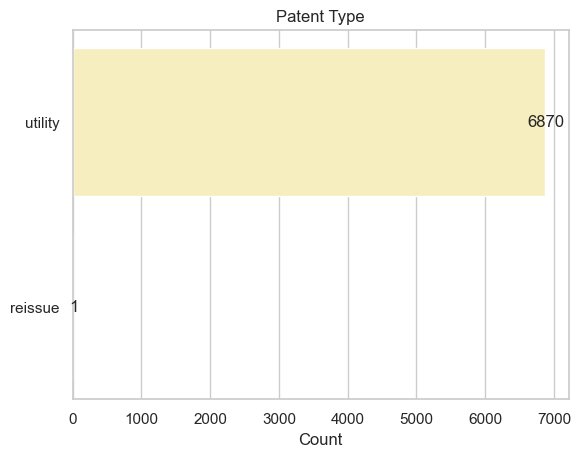

In [193]:
ax = sns.countplot(y='patent_type', data=df)
for p in ax.patches:
    width = p.get_width()    
    plt.text(width + 10,     
             p.get_y() + p.get_height() / 2,
             f'{int(width)}',
             ha='center', va='center')
plt.title('Patent Type')
plt.xlabel('Count')
plt.ylabel('')
plt.show()

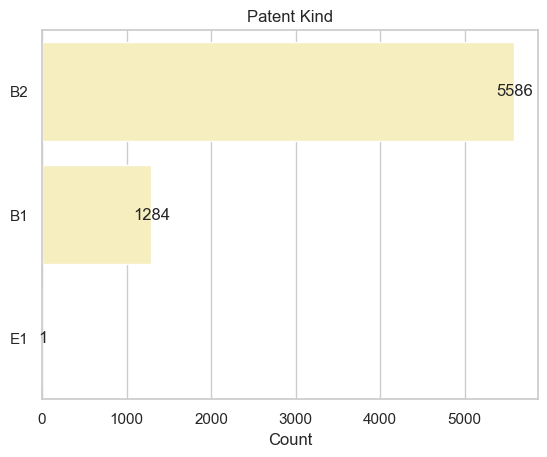

In [194]:
ax = sns.countplot(y='patent_kind', data=df)
for p in ax.patches:
    width = p.get_width()    
    plt.text(width + 10,     
             p.get_y() + p.get_height() / 2,
             f'{int(width)}',
             ha='center', va='center')
plt.title('Patent Kind')
plt.xlabel('Count')
plt.ylabel('')
plt.show()

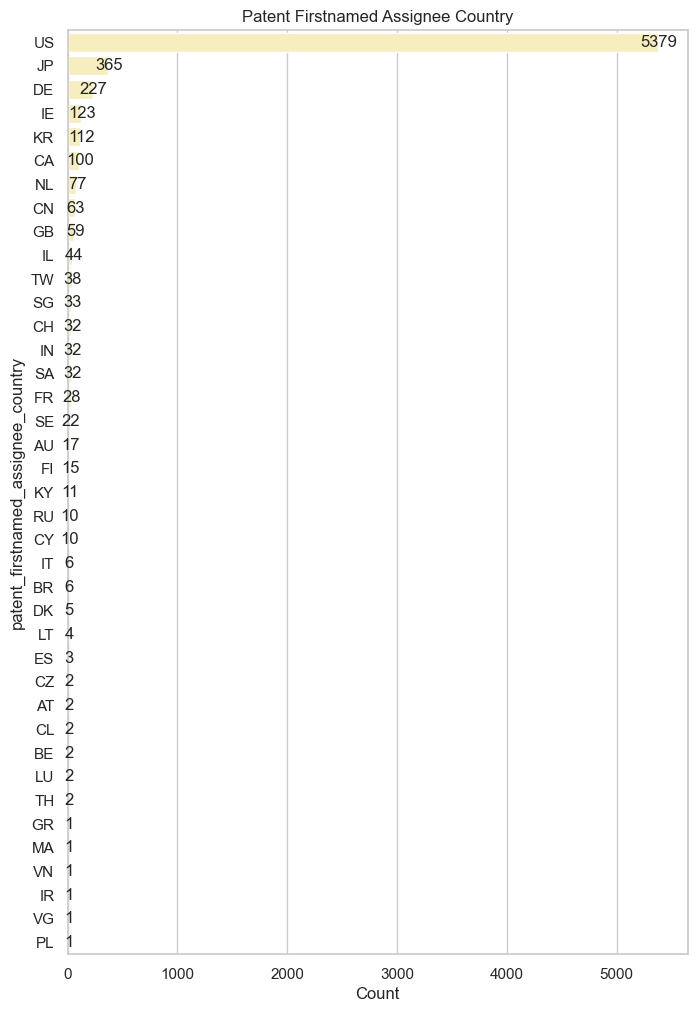

In [182]:
patent_firstnamed_assignee_country_sort = df['patent_firstnamed_assignee_country'].value_counts().index

plt.figure(figsize=(8, 12))
ax = sns.countplot(y='patent_firstnamed_assignee_country', data=df, order=patent_firstnamed_assignee_country_sort)
for p in ax.patches:
    width = p.get_width()    
    plt.text(width + 10,     
             p.get_y() + p.get_height() / 2,
             f'{int(width)}',
             ha='center', va='center')
plt.title('Patent Firstnamed Assignee Country')
plt.xlabel('Count')
plt.ylabel('')
plt.show()

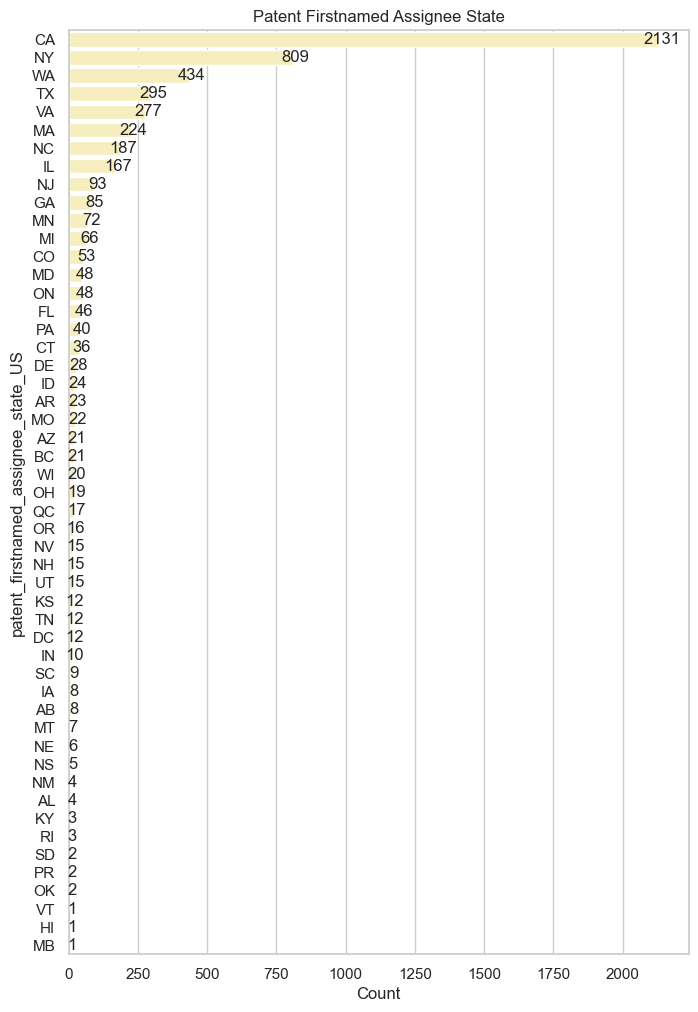

In [183]:
df['patent_firstnamed_assignee_state_US'] =  df['patent_firstnamed_assignee_state'][df['patent_firstnamed_assignee_state']!="Foreigner"]
patent_firstnamed_assignee_state_US = df['patent_firstnamed_assignee_state_US'].value_counts().index

plt.figure(figsize=(8, 12))
ax = sns.countplot(y='patent_firstnamed_assignee_state_US', data=df,order=patent_firstnamed_assignee_state_US)
for p in ax.patches:
    width = p.get_width()    
    plt.text(width + 10,     
             p.get_y() + p.get_height() / 2,
             f'{int(width)}',
             ha='center', va='center')
plt.title('Patent Firstnamed Assignee State')
plt.xlabel('Count')
plt.ylabel('')
plt.show()

/var/folders/8t/3j3yl_2s76g5gzxl2vc43hyh0000gn/T/ipykernel_4492/3952290447.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Location', y='Count', data=comparison_df, palette='pastel')


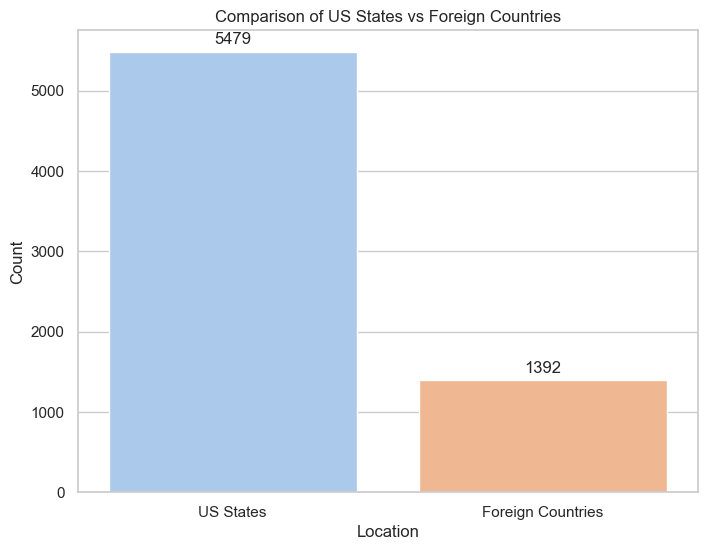

In [190]:
us_data1 =  df['patent_firstnamed_assignee_state'][df['patent_firstnamed_assignee_state']!="Foreigner"]
foreign_data1 =  df['patent_firstnamed_assignee_state'][df['patent_firstnamed_assignee_state']=="Foreigner"]
us_count = len(us_data1)
foreign_count = len(foreign_data1)

comparison_df = pd.DataFrame({
    'Location': ['US States', 'Foreign Countries'],
    'Count': [us_count, foreign_count]
})

plt.figure(figsize=(8, 6))
ax = sns.barplot(x='Location', y='Count', data=comparison_df, palette='pastel')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 9), textcoords = 'offset points')
plt.title('Comparison of US States vs Foreign Countries')
plt.xlabel('Location')
plt.ylabel('Count')
plt.show()

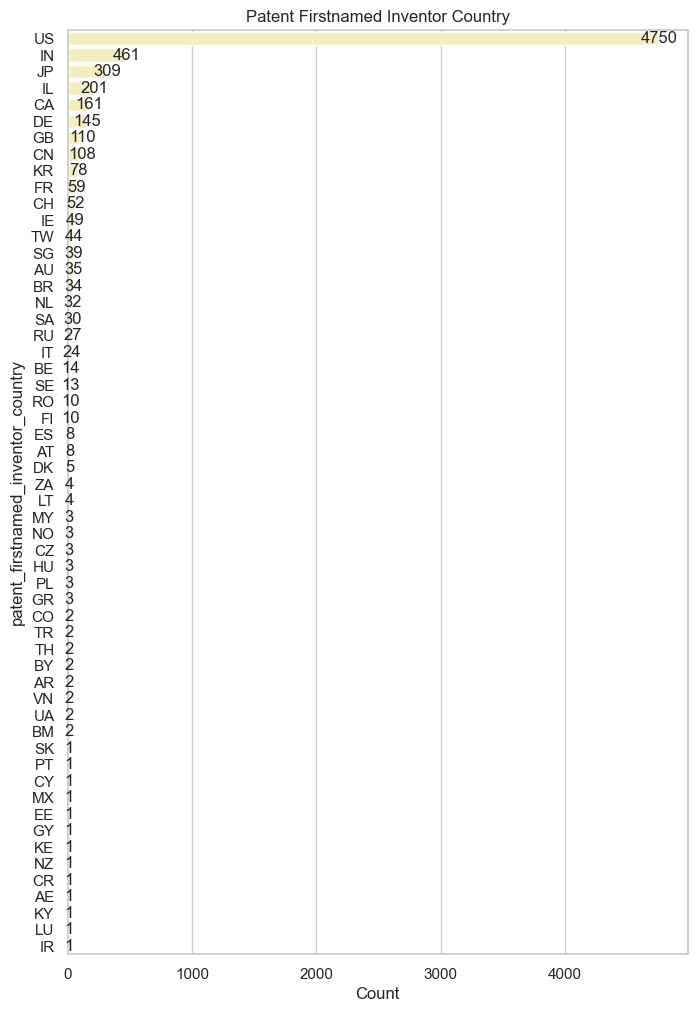

In [186]:
patent_firstnamed_inventor_country_sort = df['patent_firstnamed_inventor_country'].value_counts().index

plt.figure(figsize=(8, 12))
ax = sns.countplot(y='patent_firstnamed_inventor_country', data=df,order=patent_firstnamed_inventor_country_sort)
for p in ax.patches:
    width = p.get_width()    
    plt.text(width + 10,     
             p.get_y() + p.get_height() / 2,
             f'{int(width)}',
             ha='center', va='center')
plt.title('Patent Firstnamed Inventor Country')
plt.xlabel('Count')
plt.ylabel('')
plt.show()

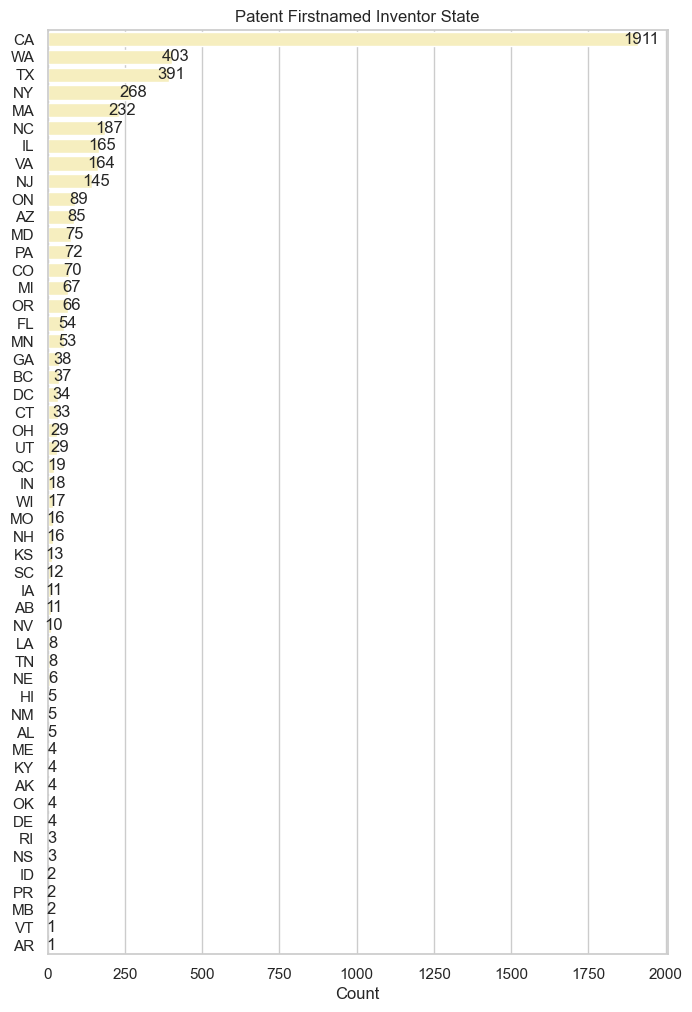

In [195]:
df['patent_firstnamed_inventor_state_US'] =  df['patent_firstnamed_inventor_state'][df['patent_firstnamed_inventor_state']!="Foreigner"]
patent_firstnamed_inventor_state_sort = df['patent_firstnamed_inventor_state_US'].value_counts().index

plt.figure(figsize=(8, 12))
ax = sns.countplot(y='patent_firstnamed_inventor_state_US', data=df,order=patent_firstnamed_inventor_state_sort)
for p in ax.patches:
    width = p.get_width()    
    plt.text(width + 10,     
             p.get_y() + p.get_height() / 2,
             f'{int(width)}',
             ha='center', va='center')
plt.title('Patent Firstnamed Inventor State')
plt.xlabel('Count')
plt.ylabel('')
plt.show()

/var/folders/8t/3j3yl_2s76g5gzxl2vc43hyh0000gn/T/ipykernel_4492/3878594076.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Location', y='Count', data=comparison_df, palette='pastel')


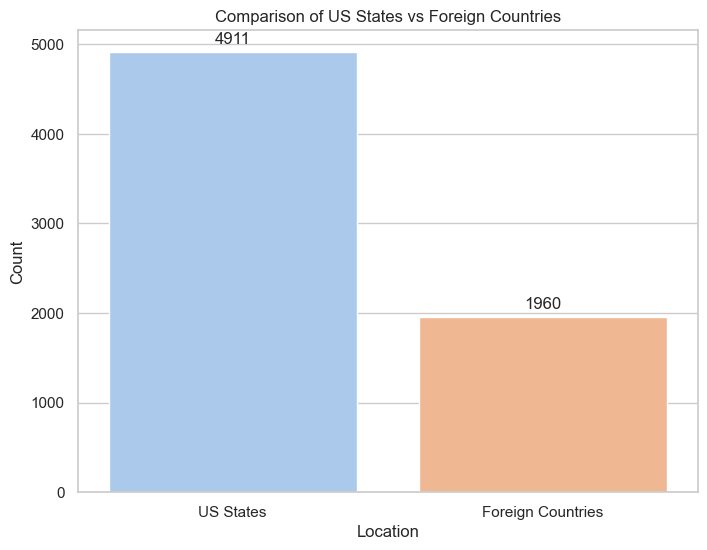

In [196]:
us_data2 =  df['patent_firstnamed_inventor_state'][df['patent_firstnamed_inventor_state']!="Foreigner"]
foreign_data2 =  df['patent_firstnamed_inventor_state'][df['patent_firstnamed_inventor_state']=="Foreigner"]
us_count = len(us_data2)
foreign_count = len(foreign_data2)

comparison_df = pd.DataFrame({
    'Location': ['US States', 'Foreign Countries'],
    'Count': [us_count, foreign_count]
})

plt.figure(figsize=(8, 6))
ax = sns.barplot(x='Location', y='Count', data=comparison_df, palette='pastel')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 9), textcoords = 'offset points')
plt.title('Comparison of US States vs Foreign Countries')
plt.xlabel('Location')
plt.ylabel('Count')
plt.show()

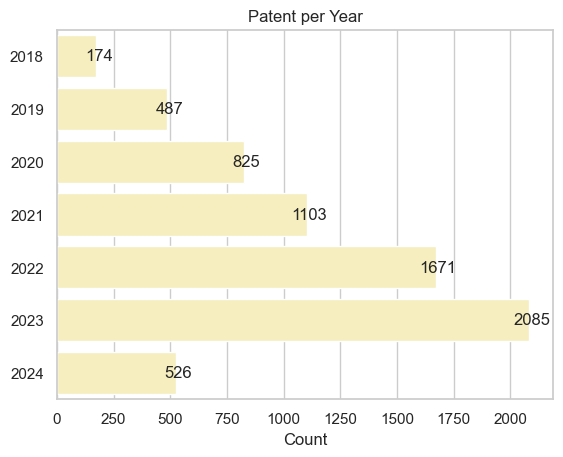

In [201]:
ax = sns.countplot(y='patent_year', data=df)
for p in ax.patches:
    width = p.get_width()    
    plt.text(width + 10,     
             p.get_y() + p.get_height() / 2,
             f'{int(width)}',
             ha='center', va='center')
plt.title('Patent per Year')
plt.xlabel('Count')
plt.ylabel('')
plt.show()

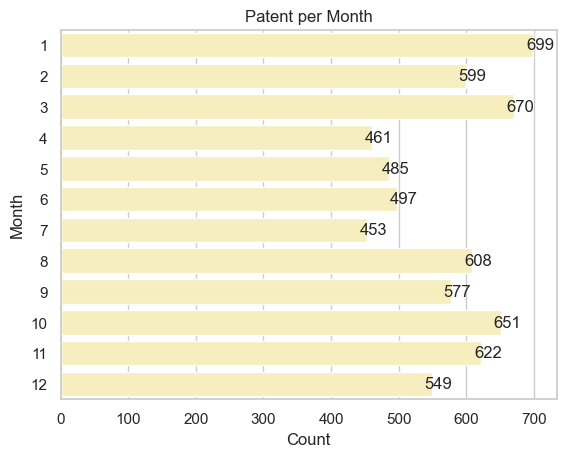

In [202]:
df['month'] = df['patent_date'].dt.month

ax = sns.countplot(y='month', data=df)
for p in ax.patches:
    width = p.get_width()    
    plt.text(width + 10,     
             p.get_y() + p.get_height() / 2,
             f'{int(width)}',
             ha='center', va='center')
plt.title('Patent per Month')
plt.xlabel('Count')
plt.ylabel('Month')
plt.show()

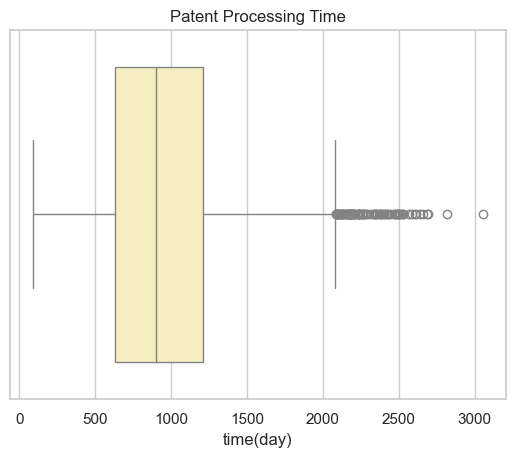

In [203]:
sns.boxplot(x='patent_processing_time', data=df)
plt.title('Patent Processing Time')
plt.xlabel('time(day)')
plt.ylabel('')
plt.show()

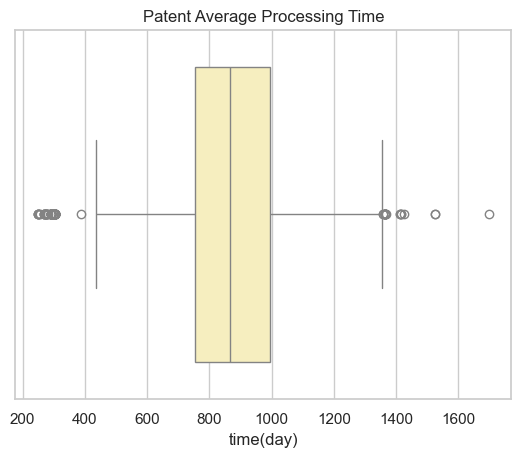

In [204]:
sns.boxplot(x='patent_average_processing_time', data=df)
plt.title('Patent Average Processing Time')
plt.xlabel('time(day)')
plt.ylabel('')
plt.show()